# DI 725: Transformers and Attention-Based Deep Networks

## An Assignment for Implementing Transformers in PyTorch

The purpose of this notebook is to guide you through the usage of sample code.

This notebook follows the baseline prepared by Andrej Karpathy, with a custom dataset (Don-Quixote by Cervantes). This version of the code, called [nanoGPT](https://github.com/karpathy/nanoGPT), is a revisit to his famous [minGPT](https://github.com/karpathy/minGPT).
### Author:
* Ümit Mert Çağlar
### Assignee:
* Nesil Bor


## Requirements
Install requirements for your environment, comment out for later uses.

Dependencies:

- [pytorch](https://pytorch.org)
- [numpy](https://numpy.org/install/)
-  `transformers` for huggingface transformers (to load GPT-2 checkpoints)
-  `datasets` for huggingface datasets (to download + preprocess datasets)
-  `tiktoken` for OpenAI's fast BPE code
-  `wandb` for optional logging
-  `tqdm` for progress bars

In [1]:
#!pip install numpy transformers datasets tiktoken wandb tqdm

Defaulting to user installation because normal site-packages is not writeable


In [ ]:
#!pip uninstall torch
#!pip install torch --index-url https://download.pytorch.org/whl/cu121

In [2]:
import torch
print(torch.__version__)
print(torch.cuda.is_available())
print(torch.version.cuda)
print(torch.cuda.current_device())
print(torch.cuda.get_device_name(0))

2.5.1+cu121
True
12.1
0
NVIDIA GeForce RTX 3060 Laptop GPU


The fastest way to get started to transformers, apart from following the labs of DI725, is to use a small model and dataset. For this purpose, we will start with training a character-level GPT on the Don-Quixote by Cervantes. The code will download a single file (2MB) and apply some transformations. Examine the code [prepare.py](data/don_char/prepare.py).

## The first model for sentiment analysis with own custom model

This first model for sentiment analysis after training. Use the following to prepare the customer service in custom own first model:

In [2]:
!python data/sentiment/prepare.py

Train class distribution:
sentiment
1    542
0    411
2     17
Name: count, dtype: int64

Test class distribution:
sentiment
0    10
1    10
2    10
Name: count, dtype: int64

Data processing complete:
- Training samples: 776
- Validation samples: 194
- Test samples: 30
Data saved to: c:\Users\nesil.bor\Desktop\Folders\master\DI725\DI725-transformer-sentiment-analysis\data\sentiment\processed

Verifying saved files:
- train.bin: 794624 bytes
- val.bin: 198656 bytes
- test.bin: 30720 bytes
- train_labels.pkl: 928 bytes
- val_labels.pkl: 342 bytes
- test_labels.pkl: 178 bytes


This creates a `train.bin`,`val.bin` and `test.bin` in that data directory. Now it is time to train our own GPT. The size of the GPT model depends on the computational resources. It is advised to have a GPU for heavy works, and to train lightweight and evaluate and infer models with a CPU.

Small scale GPT with the settings provided in the [config/train_sentiment.py](config/train_sentiment.py) config file will be trained with the following code:


In [3]:
!python train.py --config=config/train_sentiment.py --compile=False

Using device: cuda
Loaded train dataset: 776 samples
Loaded val dataset: 194 samples
DataLoaders initialized
W&B initialized in online mode. View live at: https://wandb.ai/<your-username>/nanoGPT-sentiment
Model moved to device
Optimizer initialized
Starting training loop
Iter 0, Loss: 1.2051, Accuracy: 0.3125, Data: 0.024s, Forward: 0.179s, Backward: 0.189s, Total: 0.391s
Validation Loss: 1.0309, Validation Accuracy: 0.4375
Iter 50, Loss: 0.4992, Accuracy: 0.8125, Data: 0.000s, Forward: 0.011s, Backward: 0.123s, Total: 0.134s
Iter 100, Loss: 0.3244, Accuracy: 0.8125, Data: 0.000s, Forward: 0.006s, Backward: 0.120s, Total: 0.126s
Validation Loss: 0.6222, Validation Accuracy: 0.7625
Iter 150, Loss: 0.4103, Accuracy: 0.8750, Data: 0.000s, Forward: 0.005s, Backward: 0.123s, Total: 0.128s
Iter 200, Loss: 0.0325, Accuracy: 1.0000, Data: 0.000s, Forward: 0.005s, Backward: 0.125s, Total: 0.130s
Validation Loss: 0.3112, Validation Accuracy: 0.8875
Iter 250, Loss: 0.1596, Accuracy: 0.9375, Data

wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.
wandb: Currently logged in as: adigew (adigew-middle-east-technical-university). Use `wandb login --relogin` to force relogin
wandb: Tracking run with wandb version 0.18.7
wandb: Run data is saved locally in c:\Users\nesil.bor\Desktop\Folders\master\DI725\DI725-transformer-sentiment-analysis\wandb\run-20250405_165123-be2r9po8
wandb: Run `wandb offline` to turn off syncing.
wandb: Syncing run andorian-nimoy-36
wandb:  View project at https://wandb.ai/adigew-middle-east-technical-university/nanoGPT-sentiment
wandb:  View run at https://wandb.ai/adigew-middle-east-technical-university/nanoGPT-sentiment/runs/be2r9po8
wandb:                                                                                
wandb: 
wandb: Run history:
wandb:  backward_time █▁▁▁▁▁▁▁▁▁▁
wandb:      data_time █▁▁▁▁▁▁▁▁▁▁
wandb:   forward_time █▁▁▁▁▁▁▁▁▁▁
wandb:      iteration ▁▁▂▂▂▃▄▄▅▅▅▆▇▇▇██
wandb:  lea

We are training a small scaled GPT with a context size of up to 512 characters, 384 feature channels, 6 layers of transformer with 6 attention heads. On one GTX 3060 GPU this training run takes about 3 minutes and the best validation loss is 0.2826. Based on the configuration, the model checkpoints are being written into the `--out_dir` directory `out-sentiment`. So once the training finishes we can sample from the best model by pointing the sampling script at this directory:

In [8]:
!python sample.py --out_dir=out-sentiment

Model loaded from out-sentiment\best_model.pt and moved to cuda
Loaded test dataset: 30 samples

Sample 1:
Text: thank you for calling brownbox customer support  my name is sarah  how may i assist you today? hi  s...
Predicted Sentiment: Neutral (Probabilities: [0.014343023300170898, 0.9666900038719177, 0.018967006355524063])
True Sentiment: Negative

Sample 2:
Text: thank you for calling brownbox customer support  my name is sarah  how can i assist you today? hi sa...
Predicted Sentiment: Negative (Probabilities: [0.9675621390342712, 0.01856013759970665, 0.013877768069505692])
True Sentiment: Negative

Sample 3:
Text: thank you for calling brownbox customer support  my name is jane  how may i assist you today? hi jan...
Predicted Sentiment: Negative (Probabilities: [0.9681538939476013, 0.014998635277152061, 0.016847506165504456])
True Sentiment: Negative

Sample 4:
Text: thank you for calling brownbox customer support  my name is sarah  how may i assist you today? hi sa...
Predicted S

c:\Users\nesil.bor\Desktop\Folders\master\DI725\DI725-transformer-sentiment-analysis\sample1.py:31: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch

In [10]:
!python sample.py --out_dir=out-sentiment --checkpoint=final_model.pt

Model loaded from out-sentiment\final_model.pt and moved to cuda
Loaded test dataset: 30 samples

Sample 1:
Text: thank you for calling brownbox customer support  my name is sarah  how may i assist you today? hi  s...
Predicted Sentiment: Neutral (Probabilities: [0.021121535450220108, 0.9692690968513489, 0.009609431959688663])
True Sentiment: Negative

Sample 2:
Text: thank you for calling brownbox customer support  my name is sarah  how can i assist you today? hi sa...
Predicted Sentiment: Negative (Probabilities: [0.9722861647605896, 0.014958624728024006, 0.012755151838064194])
True Sentiment: Negative

Sample 3:
Text: thank you for calling brownbox customer support  my name is jane  how may i assist you today? hi jan...
Predicted Sentiment: Negative (Probabilities: [0.9721629023551941, 0.013804925605654716, 0.01403222605586052])
True Sentiment: Negative

Sample 4:
Text: thank you for calling brownbox customer support  my name is sarah  how may i assist you today? hi sa...
Predicted 

c:\Users\nesil.bor\Desktop\Folders\master\DI725\DI725-transformer-sentiment-analysis\sample1.py:31: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch

## Quick start with less resources

If we are [low on resources](https://www.youtube.com/watch?v=rcXzn6xXdIc), we can use a simpler version of the training, first we need to set compile to false, this is also a must for Windows OS for now. We also set the device to CPU. The model that is trained in 10 minutes for a starter grade GPU, will be trained in a much longer time, so we can also decrease the dimensions of our model as follows:

In [1]:
import os
os.environ['CUDA_VISIBLE_DEVICES'] = "-1"  # More reliable than empty string
import torch
torch.cuda.is_available = lambda: False  # Monkey-patch to always return False


In [29]:

!python train.py config/train_sentiment.py --device=cpu --out_dir="out-sentiment" --compile=False --eval_iters=20 --log_interval=50 --block_size=64 --batch_size=12 --n_layer=4 --n_head=4 --n_embd=128 --max_iters=1000 --lr_decay_iters=1000 --dropout=0.0

In [3]:
print(torch.cuda.is_available())

False


In [31]:
!python sample.py --out_dir=out-sentiment --device=cpu

usage: sample.py [-h] [--out_dir OUT_DIR] [--checkpoint CHECKPOINT]
sample.py: error: unrecognized arguments: --device=cpu


In [6]:
import os
os.environ['CUDA_VISIBLE_DEVICES'] = "0"  # More reliable than empty string
import torch
torch.cuda.is_available = lambda: True  # Monkey-patch to always return False


In [4]:
!set CUDA_VISIBLE_DEVICES=0

In [7]:
print(torch.cuda.is_available())

True


## The second model - Finetuning

We will obtain the pre-trained model weights of gpt-2 and fine-tune it.
Finetuning or transfer learning is a precious method of achieving better models thanks to pre-trained models. Finetuning GPT models is just as simple as training from scratch! We will now download the customer service (again) but this time we will define it with tokens (using OpenAI's BPE tokenizer) instead of characters.



In [8]:
!python data/sentiment/prepare.py

Train class distribution:
sentiment
1    542
0    411
2     17
Name: count, dtype: int64

Test class distribution:
sentiment
0    10
1    10
2    10
Name: count, dtype: int64

Data processing complete:
- Training samples: 776
- Validation samples: 194
- Test samples: 30
Data saved to: c:\Users\nesil.bor\Desktop\Folders\master\DI725\DI725-transformer-sentiment-analysis\data\sentiment\processed

Verifying saved files:
- train.bin: 794624 bytes
- val.bin: 198656 bytes
- test.bin: 30720 bytes
- train_labels.pkl: 928 bytes
- val_labels.pkl: 342 bytes
- test_labels.pkl: 178 bytes


Run an example finetuning like:

In [12]:
!python train_finetune.py --compile=False

Using device: cuda
Loaded train dataset: 776 samples
Loaded val dataset: 194 samples
DataLoaders initialized
WANDB initialized
Loading weights from pretrained GPT: gpt2
Number of parameters: 123.66M
Model loaded and moved to cuda
Froze all layers except sentiment_head and transformer.h.11
Using fused AdamW: True
Optimizer initialized
Iter 0, Loss: 15.0417, Accuracy: 0.1250, Data: 0.021s, Forward: 0.246s, Backward: 0.069s, Total: 0.337s
Validation Loss: 18.8235, Validation Accuracy: 0.0250
Saved best model at iteration 0
Iter 50, Loss: 4.5565, Accuracy: 0.3750, Data: 0.022s, Forward: 0.125s, Backward: 0.003s, Total: 0.150s
Iter 100, Loss: 2.5730, Accuracy: 0.1250, Data: 0.024s, Forward: 0.129s, Backward: 0.003s, Total: 0.156s
Validation Loss: 10.2233, Validation Accuracy: 0.0375
Saved best model at iteration 100
Iter 150, Loss: 0.9738, Accuracy: 0.5000, Data: 0.022s, Forward: 0.128s, Backward: 0.003s, Total: 0.153s
Iter 200, Loss: 0.8748, Accuracy: 0.5000, Data: 0.023s, Forward: 0.129s,

wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.
wandb: Currently logged in as: adigew (adigew-middle-east-technical-university). Use `wandb login --relogin` to force relogin
wandb: Tracking run with wandb version 0.18.7
wandb: Run data is saved locally in c:\Users\nesil.bor\Desktop\Folders\master\DI725\DI725-transformer-sentiment-analysis\wandb\run-20250406_170126-3njvu8pc
wandb: Run `wandb offline` to turn off syncing.
wandb: Syncing run engineer-nimoy-4
wandb:  View project at https://wandb.ai/adigew-middle-east-technical-university/nanoGPT-sentiment-gpt2
wandb:  View run at https://wandb.ai/adigew-middle-east-technical-university/nanoGPT-sentiment-gpt2/runs/3njvu8pc
wandb:                                                                                
wandb: 
wandb: Run history:
wandb:      iteration ▁▁▁▂▂▂▂▂▃▃▃▄▄▄▄▅▅▅▅▅▆▆▆▇▇▇▇███
wandb:  learning_rate ▁▅████▇▇▆▆▅▅▄▄▃▃▂▂▂▂
wandb: train_accuracy ▁▃▁▄▄▇▇▇▆▅▄▇▆▆▄█▇▆▅▆
wandb

This script fine-tunes a pre-trained GPT-2 model for a 3-class sentiment analysis task, adapting the language model for classification while preserving its core capabilities. The implementation builds a custom GPT architecture with key components like multi-head attention, layer normalization, and feed-forward networks, while adding a dedicated sentiment classification head on top of the transformer. It initializes with pre-trained GPT-2 weights (supporting various model sizes) and employs a strategic fine-tuning approach that freezes all layers except the last transformer block and the sentiment head, which receives a 10x higher learning rate to accelerate task-specific adaptation. The training process uses AdamW optimization with weight decay, cosine learning rate scheduling with warmup, and early stopping based on validation performance. The code handles batched training (batch size 8 due to memory constraints) on pre-processed sequences of length 512, with comprehensive logging of metrics like loss and accuracy through Weights & Biases. By maintaining most of the model's pre-trained weights while selectively fine-tuning the top layers, this approach efficiently adapts the powerful language model to the sentiment analysis task without losing its general language understanding capabilities. Model architecture is changable to `{'gpt2', 'gpt2-medium', 'gpt2-large', 'gpt2-xl'}`) and can be decreased in size by the `block_size` (context length). The best checkpoint (lowest validation loss) will be in the `out_dir` directory, e.g. in `out-sentiment-gpt2` by default, per the config file. You can then run the code in `sample_finetune.py --out_dir=out-sentiment-gpt2`:


# Inference and Sampling
Use the script `sample_finetune.py` to sample either from pre-trained GPT-2 models released by OpenAI, or from a model you trained yourself. This script is designed to run sentiment prediction on a test dataset using a fine-tuned nanoGPT-style GPT-2 model. It loads a pre-trained model from a specified checkpoint and evaluates its performance on test data. The model architecture includes components like LayerNorm, CausalSelfAttention, and MLP, which are typical in transformer models. The script processes the test data, performs inference to predict sentiment labels (negative, neutral, positive), and compares these predictions to the true labels to calculate accuracy. The results, including the predicted and true sentiments for each sample, are printed out, along with a summary of the overall accuracy.

In [1]:
!python sample_finetune.py --out_dir=out-sentiment-gpt2 --checkpoint=best_model.pt

Model loaded from out-sentiment-gpt2\best_model.pt and moved to cuda
Loaded test dataset: 30 samples

Sample 1:
Text: thank you for calling brownbox customer support  my name is sarah  how may i assist you today? hi  s...
Predicted Sentiment: Neutral (Probabilities: [0.338118314743042, 0.5629324316978455, 0.09894923865795135])
True Sentiment: Negative

Sample 2:
Text: thank you for calling brownbox customer support  my name is sarah  how can i assist you today? hi sa...
Predicted Sentiment: Negative (Probabilities: [0.5538395047187805, 0.3647975027561188, 0.08136302977800369])
True Sentiment: Negative

Sample 3:
Text: thank you for calling brownbox customer support  my name is jane  how may i assist you today? hi jan...
Predicted Sentiment: Neutral (Probabilities: [0.39019736647605896, 0.5070598721504211, 0.10274279117584229])
True Sentiment: Negative

Sample 4:
Text: thank you for calling brownbox customer support  my name is sarah  how may i assist you today? hi sa...
Predicted Senti

In [2]:
!python sample_finetune.py --out_dir=out-sentiment-gpt2 --checkpoint=final_model.pt

Model loaded from out-sentiment-gpt2\final_model.pt and moved to cuda
Loaded test dataset: 30 samples

Sample 1:
Text: thank you for calling brownbox customer support  my name is sarah  how may i assist you today? hi  s...
Predicted Sentiment: Neutral (Probabilities: [0.3347285985946655, 0.5667935609817505, 0.0984777882695198])
True Sentiment: Negative

Sample 2:
Text: thank you for calling brownbox customer support  my name is sarah  how can i assist you today? hi sa...
Predicted Sentiment: Negative (Probabilities: [0.5547237396240234, 0.36500921845436096, 0.0802670568227768])
True Sentiment: Negative

Sample 3:
Text: thank you for calling brownbox customer support  my name is jane  how may i assist you today? hi jan...
Predicted Sentiment: Neutral (Probabilities: [0.3887985646724701, 0.5090003609657288, 0.10220105946063995])
True Sentiment: Negative

Sample 4:
Text: thank you for calling brownbox customer support  my name is sarah  how may i assist you today? hi sa...
Predicted Senti

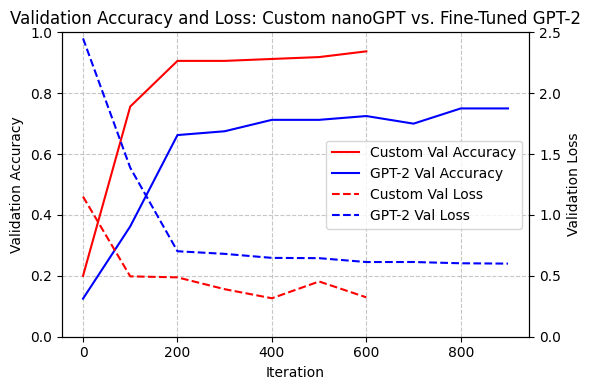

In [13]:
import matplotlib.pyplot as plt

# Custom nanoGPT data from logs
iters_custom = [0, 100, 200, 300, 400, 500, 600]
val_acc_custom = [0.2000, 0.7562, 0.9062, 0.9062, 0.9125, 0.9187, 0.9375]
val_loss_custom = [1.1509, 0.4958, 0.4875, 0.3904, 0.3159, 0.4536, 0.3234]

# Fine-tuned GPT-2 data from logs
iters_gpt2 = [0, 100, 200, 300, 400, 500, 600, 700, 800, 900]
val_acc_gpt2 = [0.1250, 0.3625, 0.6625, 0.6750, 0.7125, 0.7125, 0.7250, 0.7000, 0.7500, 0.7500]
val_loss_gpt2 = [2.4504, 1.3881, 0.7020, 0.6806, 0.6475, 0.6452, 0.6134, 0.6137, 0.6033, 0.6004]

# Create figure with dual y-axes
fig, ax1 = plt.subplots(figsize=(6, 4))

# Plot validation accuracy
ax1.plot(iters_custom, val_acc_custom, 'r-', label='Custom Val Accuracy')
ax1.plot(iters_gpt2, val_acc_gpt2, 'b-', label='GPT-2 Val Accuracy')
ax1.set_xlabel('Iteration')
ax1.set_ylabel('Validation Accuracy', color='black')
ax1.tick_params(axis='y', labelcolor='black')
ax1.set_ylim(0, 1)
ax1.grid(True, linestyle='--', alpha=0.7)

# Create second y-axis for validation loss
ax2 = ax1.twinx()
ax2.plot(iters_custom, val_loss_custom, 'r--', label='Custom Val Loss')
ax2.plot(iters_gpt2, val_loss_gpt2, 'b--', label='GPT-2 Val Loss')
ax2.set_ylabel('Validation Loss', color='black')
ax2.tick_params(axis='y', labelcolor='black')
ax2.set_ylim(0, 2.5)

# Titles and legends
plt.title('Validation Accuracy and Loss: Custom nanoGPT vs. Fine-Tuned GPT-2')
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='center right')

# Save figure
plt.tight_layout()
plt.savefig('comparison.png', dpi=300)
plt.show()



## Acknowledgements

This code is a fork from Andrej Karpathy's introductory [NanoGPT repository](https://github.com/karpathy/nanoGPT), which is an updated form of minGPT.

# Further Experiments

(Optional)

For further experiments, you can, for example, reproduce the GPT-2, which is still powerful, by following the link to the Andrej Karpathy's repository.